In [1]:
import pandas as pd

## Multi-index

In [9]:
data = {
    'Year' : [2019, 2019, 2020, 2020, 2021, 2021],
    'Quarter' : [1, 2, 1, 2, 1, 2],
    'Revenue' : [100, 120, 110, 130, 105, 125]
}

df = pd.DataFrame(data)
df_multi = df.set_index(['Year', 'Quarter'])
display(df_multi)

Revenue
Year Quarter         
2019 1            100
     2            120
2020 1            110
     2            130
2021 1            105
     2            125

In [10]:
display(df_multi.loc[2020])
display(df_multi.loc[2020].loc[1].loc['Revenue'])
idxs = (df_multi.index
                .get_level_values('Quarter') == 1)
display(idxs)
display(df_multi[idxs])

,Revenue
Quarter,
1,110
2,130


110

array([ True, False,  True, False,  True, False])

,,Revenue
Year,Quarter,
2019,1,100
2020,1,110
2021,1,105


### stack | unstack | reset_index

In [11]:
df_multi.reset_index().set_index(['Year', 'Quarter'])

Revenue
Year Quarter         
2019 1            100
     2            120
2020 1            110
     2            130
2021 1            105
     2            125

In [12]:
df_multi.unstack(level = -1).stack(level=-1)

Revenue
Year Quarter         
2019 1            100
     2            120
2020 1            110
     2            130
2021 1            105
     2            125

In [13]:
df_multi.unstack(level = -2).stack(level=-1)

Revenue
Quarter Year         
1       2019      100
        2020      110
        2021      105
2       2019      120
        2020      130
        2021      125

## Concat & append

In [14]:
rows = [{'population' : 38332521, 'area' : 423967},
            {'population' : 26448193, 'area' : 695662},
            {'population' : 19651127, 'area' : 141297},
            {'population' : 19552860, 'area' : 170312},
            {'population' : 12882135, 'area' : 149995}]

row_index = ['California', 
                'Texas', 
                'New York', 
                'Florida', 
                'Illinois']

df = pd.DataFrame(rows, index = row_index)
display(df)

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [15]:
df1 = df.iloc[:3, :]
df2 = df.iloc[3:, :]
display(pd.concat([df1, df2]))

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [16]:
df1 = df.iloc[:, :1]
df2 = df.iloc[:, 1:]
pd.concat([df1, df2], axis = 1)

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [17]:
df1 = df.copy()
df1['density'] = df1['population'] / df1['area']
df2 = df.copy()

pd.concat([df1, df2], join = 'outer')

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763
California,38332521,423967,NaN
Texas,26448193,695662,NaN
New York,19651127,141297,NaN
Florida,19552860,170312,NaN
Illinois,12882135,149995,NaN


In [18]:
pd.concat([df1, df2], join = 'inner')

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [19]:
df1 = df.iloc[:4, :]
df2 = df.iloc[3:, :]
df_concat = pd.concat([df1, df2])
df_concat.loc['Florida', 'area']

Florida    170312
Florida    170312
Name: area, dtype: int64

In [20]:
pd.concat([df1, df2], ignore_index = True)

,population,area
0,38332521,423967
1,26448193,695662
2,19651127,141297
3,19552860,170312
4,19552860,170312
5,12882135,149995


In [21]:
pd.concat([df1, df2], keys = ['df1', 'df2'])

population    area
df1 California    38332521  423967
    Texas         26448193  695662
    New York      19651127  141297
    Florida       19552860  170312
df2 Florida       19552860  170312
    Illinois      12882135  149995

In [22]:
pd.concat([df1, df2], verify_integrity = True)

ValueError: Indexes have overlapping values: Index(['Florida'], dtype='object')

### Concatenating many rows

In [25]:
import time
N = 2 * 10 ** 3

# Option 1
start_time = time.time()
rows = list()
for i in range(N):
    rows.append({'a' : 1, 'b' : 2})
pd.DataFrame(rows)
print(f"Option 1 took {time.time() - start_time:.3f} seconds.")

# Option 2
start_time = time.time()
df = pd.DataFrame(columns = ['a', 'b'])
for i in range(N):
    df = pd.concat([df, pd.Series([1, 2], index = ['a', 'b'])])
print(f"Option 2 took {time.time() - start_time:.3f} seconds.")

# Option 3
start_time = time.time()
rows = list()
for i in range(N):
    rows.append(pd.Series([1, 2], index = ['a', 'b']))
df = pd.concat(rows)
print(f"Option 3 took {time.time() - start_time:.3f} seconds.")

# Option 4
start_time = time.time()
rows = list()
for i in range(N):
    rows.append(pd.Series([1, 2], index = ['a', 'b']))
df = pd.DataFrame(rows)
print(f"Option 4 took {time.time() - start_time:.3f} seconds.")

Option 1 took 0.005 seconds.
Option 2 took 6.573 seconds.
Option 3 took 0.165 seconds.
Option 4 took 0.290 seconds.


## Merge & join

In [65]:
df1 = pd.DataFrame({'employee' : ['Bob', 
                                     'Jake', 
                                     'Lisa', 
                                     'Sue'],
                      'group' : ['Accounting', 
                                     'Engineering', 
                                     'Engineering', 
                                     'HR']})

df2 = pd.DataFrame({'employee' : ['Lisa',
                                    'Bob',
                                    'Jake',
                                    'Sue'],
                      'hire_date' : [2004,
                                        2008,
                                        2012,
                                        2014]})

df3 = pd.DataFrame({'group' : ['Accounting', 'Engineering', 'HR'],
                       'supervisor' : ['Carly', 'Guido', 'Steve']})

df4 = pd.DataFrame({'group' : ['Accounting'
                                   , 'Accounting'
                                   , 'Engineering' 
                                   , 'Engineering' 
                                   , 'HR'
                                   , 'HR'],
                    'skills' : ['math'
                                   , 'spreadsheets'
                                   , 'coding'
                                   , 'linux'
                                   , 'spreadsheets'
                                   , 'organization']})

display(df1, df2, df3, df4)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [62]:
pd.merge(df1, df2)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [64]:
pd.merge(df1, df3)

,employee,group,supervisor
0,Bob,Accounting,Carly
1,Jake,Engineering,Guido
2,Lisa,Engineering,Guido
3,Sue,HR,Steve


In [66]:
pd.merge(df1, df4)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


## Aggregeren & groeperen

In [67]:
import seaborn as sns
planets = sns.load_dataset('planets')

In [69]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [70]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [78]:
print(planets['distance'].median())

55.25


### Groupby

In [86]:
for year, group in planets.groupby('year'):
    print(year)
    display(group.head())

1989


,method,number,orbital_period,mass,distance,year
441,Radial Velocity,1,83.888,11.68,40.57,1989


1992


,method,number,orbital_period,mass,distance,year
941,Pulsar Timing,3,25.2620,NaN,NaN,1992
942,Pulsar Timing,3,66.5419,NaN,NaN,1992


1994


,method,number,orbital_period,mass,distance,year
943,Pulsar Timing,3,98.2114,NaN,NaN,1994


1995


,method,number,orbital_period,mass,distance,year
16,Radial Velocity,1,4.230785,0.472,15.36,1995


1996


,method,number,orbital_period,mass,distance,year
7,Radial Velocity,1,798.5000,NaN,21.41,1996
13,Radial Velocity,3,1078.0000,2.53,14.08,1996
17,Radial Velocity,5,14.6510,0.80,12.53,1996
25,Radial Velocity,1,116.6884,NaN,18.11,1996
62,Radial Velocity,1,3.3135,3.90,15.60,1996


1997


,method,number,orbital_period,mass,distance,year
61,Radial Velocity,1,39.845,1.04,17.43,1997


1998


,method,number,orbital_period,mass,distance,year
142,Radial Velocity,4,61.116600,2.2756,4.70,1998
526,Radial Velocity,2,58.112890,8.0200,37.88,1998
554,Radial Velocity,2,3.097000,0.5200,47.92,1998
589,Radial Velocity,1,442.100000,1.2300,21.29,1998
603,Radial Velocity,2,7.126816,1.3900,19.72,1998


1999


,method,number,orbital_period,mass,distance,year
65,Radial Velocity,4,241.25800,1.981,13.47,1999
66,Radial Velocity,4,1276.46000,4.132,13.47,1999
114,Radial Velocity,1,15.76491,3.910,10.91,1999
237,Radial Velocity,1,1075.20000,6.210,32.56,1999
366,Radial Velocity,1,3.51000,0.420,28.94,1999


2000


,method,number,orbital_period,mass,distance,year
48,Radial Velocity,1,2502.00000,1.5500,3.22,2000
78,Radial Velocity,1,3.48777,NaN,80.00,2000
143,Radial Velocity,4,30.08810,0.7142,4.70,2000
147,Radial Velocity,1,133.71000,3.3700,17.62,2000
243,Radial Velocity,2,262.70900,2.3000,37.16,2000


2001


,method,number,orbital_period,mass,distance,year
14,Radial Velocity,3,2391.000,0.54,14.08,2001
198,Radial Velocity,2,349.700,1.25,25.64,2001
209,Radial Velocity,1,829.000,0.80,32.70,2001
211,Radial Velocity,1,431.880,2.07,77.82,2001
272,Radial Velocity,1,738.459,2.61,34.60,2001


2002


,method,number,orbital_period,mass,distance,year
6,Radial Velocity,1,1773.4,4.64,18.15,2002
19,Radial Velocity,5,4909.0,3.53,12.53,2002
204,Radial Velocity,1,1183.0,4.90,89.85,2002
226,Radial Velocity,1,227.0,1.80,44.15,2002
244,Radial Velocity,2,1708.0,1.92,37.16,2002


2003


,method,number,orbital_period,mass,distance,year
52,Radial Velocity,1,903.300,1.850,13.79,2003
207,Radial Velocity,1,62.218,0.229,11.11,2003
219,Radial Velocity,1,22.090,0.480,40.32,2003
258,Radial Velocity,1,466.200,1.370,22.38,2003
274,Radial Velocity,1,1561.000,7.710,51.97,2003


2004


,method,number,orbital_period,mass,distance,year
18,Radial Velocity,5,44.38000,0.165,12.53,2004
31,Imaging,1,NaN,NaN,140.00,2004
35,Imaging,1,NaN,NaN,139.00,2004
73,Imaging,1,NaN,NaN,52.40,2004
123,Radial Velocity,1,2.64385,NaN,10.23,2004


2005


,method,number,orbital_period,mass,distance,year
29,Imaging,1,NaN,NaN,45.52,2005
125,Radial Velocity,4,5.36874,0.049,6.27,2005
126,Radial Velocity,4,12.92920,0.017,6.27,2005
127,Radial Velocity,4,66.80000,0.022,6.27,2005
128,Radial Velocity,4,3.14942,0.006,6.27,2005


2006


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.3,7.10,77.40,2006
36,Imaging,1,NaN,NaN,18.39,2006
50,Radial Velocity,1,594.9,7.60,47.53,2006
90,Imaging,1,NaN,NaN,NaN,2006
141,Radial Velocity,1,1845.0,0.91,8.77,2006


2007


,method,number,orbital_period,mass,distance,year
3,Radial Velocity,1,326.03,19.400,110.62,2007
21,Radial Velocity,5,261.20,0.172,12.53,2007
30,Imaging,1,NaN,NaN,165.00,2007
53,Radial Velocity,1,1251.00,NaN,31.12,2007
55,Radial Velocity,1,136.75,2.800,62.66,2007


2008


,method,number,orbital_period,mass,distance,year
1,Radial Velocity,1,874.774,2.21,56.95,2008
5,Radial Velocity,1,185.840,4.80,76.39,2008
8,Radial Velocity,1,993.300,10.30,73.10,2008
12,Radial Velocity,1,479.100,3.88,97.28,2008
27,Radial Velocity,1,952.700,5.30,97.18,2008


2009


,method,number,orbital_period,mass,distance,year
4,Radial Velocity,1,516.220,10.500,119.47,2009
11,Radial Velocity,1,335.100,9.880,39.43,2009
15,Radial Velocity,3,14002.000,1.640,14.08,2009
22,Radial Velocity,3,4.215,0.016,8.52,2009
23,Radial Velocity,3,38.021,0.057,8.52,2009


2010


,method,number,orbital_period,mass,distance,year
9,Radial Velocity,2,452.80,1.99,74.79,2010
10,Radial Velocity,2,883.00,0.86,74.79,2010
39,Eclipse Timing Variations,2,5573.55,NaN,500.00,2010
40,Eclipse Timing Variations,2,2883.50,NaN,500.00,2010
45,Radial Velocity,1,380.80,1.80,20.21,2010


2011


,method,number,orbital_period,mass,distance,year
2,Radial Velocity,1,763.00000,2.6,19.84,2011
20,Radial Velocity,5,0.73654,NaN,12.53,2011
41,Eclipse Timing Variations,1,2900.00000,NaN,NaN,2011
43,Eclipse Timing Variations,2,5840.00000,NaN,NaN,2011
44,Eclipse Timing Variations,2,1916.25000,NaN,NaN,2011


2012


,method,number,orbital_period,mass,distance,year
26,Radial Velocity,1,691.9000,NaN,81.50,2012
42,Eclipse Timing Variations,1,4343.5000,4.2000,NaN,2012
46,Radial Velocity,1,3.2357,0.0036,1.35,2012
49,Radial Velocity,1,417.9000,NaN,70.42,2012
54,Imaging,1,NaN,NaN,52.03,2012


2013


,method,number,orbital_period,mass,distance,year
28,Radial Velocity,1,181.40,3.2,45.52,2013
34,Imaging,1,NaN,NaN,145.00,2013
58,Radial Velocity,1,277.02,1.7,80.64,2013
63,Radial Velocity,1,305.50,20.6,92.51,2013
70,Imaging,1,NaN,NaN,36.00,2013


2014


,method,number,orbital_period,mass,distance,year
112,Transit,1,3.575320,NaN,NaN,2014
194,Transit,1,2.691548,NaN,322.00,2014
440,Radial Velocity,1,3827.000000,0.48,20.48,2014
501,Radial Velocity,2,3452.000000,2.58,68.54,2014
650,Transit,1,7.845700,NaN,222.00,2014


In [87]:
planets.groupby('year').mean()

,number,orbital_period,mass,distance
year,,,,
1989,1.000000,83.888000,11.680000,40.570000
1992,3.000000,45.901950,NaN,NaN
1994,3.000000,98.211400,NaN,NaN
1995,1.000000,4.230785,0.472000,15.360000
1996,2.500000,335.961656,1.979400,15.866667
1997,1.000000,39.845000,1.040000,17.430000
1998,2.200000,114.310661,2.687120,26.302000
1999,1.600000,552.280919,3.236643,30.947333
2000,1.687500,540.945323,3.633014,30.752500


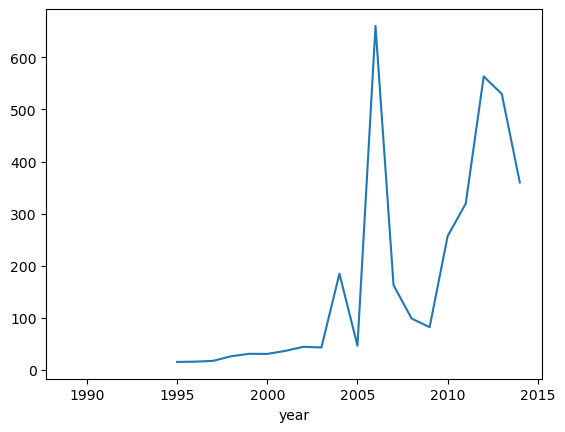

In [90]:
planets.groupby('year')['distance'].mean().plot();

In [112]:
planets.distance.sum(skipna = False)

nan

In [107]:
a = planets.groupby('year')

In [113]:
planets.groupby('year')['mass'].mean()

year
1989    11.680000
1992          NaN
1994          NaN
1995     0.472000
1996     1.979400
1997     1.040000
1998     2.687120
1999     3.236643
2000     3.633014
2001     3.430909
2002     3.937290
2003     3.660955
2004     1.454267
2005     2.003897
2006     1.799800
2007     3.702094
2008     3.424339
2009     3.628568
2010     1.289610
2011     1.209084
2012     3.658596
2013     2.203400
2014     1.068000
Name: mass, dtype: float64

In [118]:
def custom_mean(df):
    return df.mean(skipna=False)
planets.groupby('year').agg({'mass':custom_mean})

,mass
year,
1989,11.68000
1992,NaN
1994,NaN
1995,0.47200
1996,NaN
1997,1.04000
1998,2.68712
1999,NaN
2000,NaN


In [120]:
import numpy as np
planets.groupby('year')['mass'].aggregate(['min', np.median, max])

,min,median,max
year,,,
1989,11.68000,11.6800,11.680
1992,NaN,NaN,NaN
1994,NaN,NaN,NaN
1995,0.47200,0.4720,0.472
1996,0.68760,1.6650,3.900
1997,1.04000,1.0400,1.040
1998,0.52000,1.3900,8.020
1999,0.42000,1.9855,8.440
2000,0.24900,1.4150,18.100


In [121]:
planets.groupby('year').agg({
                                'number' : 'sum',
                                'orbital_period' : 'mean',
                                'mass' : np.nanmean,
                                'distance' : np.nanmean
                            })

,number,orbital_period,mass,distance
year,,,,
1989,1,83.888000,11.680000,40.570000
1992,6,45.901950,NaN,NaN
1994,3,98.211400,NaN,NaN
1995,1,4.230785,0.472000,15.360000
1996,15,335.961656,1.979400,15.866667
1997,1,39.845000,1.040000,17.430000
1998,11,114.310661,2.687120,26.302000
1999,24,552.280919,3.236643,30.947333
2000,27,540.945323,3.633014,30.752500


In [122]:
for year, group in planets.groupby('year'):
    print(f"in {year} we observed {len(group)} planet{'s' if len(group) > 1 else ''}")

in 1989 we observed 1 planet
in 1992 we observed 2 planets
in 1994 we observed 1 planet
in 1995 we observed 1 planet
in 1996 we observed 6 planets
in 1997 we observed 1 planet
in 1998 we observed 5 planets
in 1999 we observed 15 planets
in 2000 we observed 16 planets
in 2001 we observed 12 planets
in 2002 we observed 32 planets
in 2003 we observed 25 planets
in 2004 we observed 26 planets
in 2005 we observed 39 planets
in 2006 we observed 31 planets
in 2007 we observed 53 planets
in 2008 we observed 74 planets
in 2009 we observed 98 planets
in 2010 we observed 102 planets
in 2011 we observed 185 planets
in 2012 we observed 140 planets
in 2013 we observed 118 planets
in 2014 we observed 52 planets


In [124]:
planets.groupby('year')['mass'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1989,1.0,11.680000,NaN,11.68000,11.680000,11.6800,11.6800,11.680
1992,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,1.0,0.472000,NaN,0.47200,0.472000,0.4720,0.4720,0.472
1996,4.0,1.979400,1.533145,0.68760,0.771900,1.6650,2.8725,3.900
1997,1.0,1.040000,NaN,1.04000,1.040000,1.0400,1.0400,1.040
1998,5.0,2.687120,3.045943,0.52000,1.230000,1.3900,2.2756,8.020
1999,14.0,3.236643,2.593222,0.42000,1.515000,1.9855,4.0765,8.440
2000,14.0,3.633014,5.329570,0.24900,0.866750,1.4150,3.2475,18.100


In [133]:
planets.groupby('year')['mass'].aggregate([
                                            'count',
                                            'mean',
                                            'std',
                                            'min',
                                            lambda x : x.quantile(0.25),
                                            'median',
                                            lambda x : x.quantile(0.75),
                                            'max'
]).rename({'<lambda_0>' : '25%'
               , 'median' : '50%'
               , '<lambda_1>' : '75%'}
               , axis = 1)

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1989,1,11.680000,NaN,11.68000,11.680000,11.6800,11.6800,11.680
1992,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,1,0.472000,NaN,0.47200,0.472000,0.4720,0.4720,0.472
1996,4,1.979400,1.533145,0.68760,0.771900,1.6650,2.8725,3.900
1997,1,1.040000,NaN,1.04000,1.040000,1.0400,1.0400,1.040
1998,5,2.687120,3.045943,0.52000,1.230000,1.3900,2.2756,8.020
1999,14,3.236643,2.593222,0.42000,1.515000,1.9855,4.0765,8.440
2000,14,3.633014,5.329570,0.24900,0.866750,1.4150,3.2475,18.100


In [136]:
df_agg = (planets
              .groupby('year')
              [['mass', 'distance']]
              .aggregate(['min', np.median, max]))

df_agg.loc[1995].loc['distance'].loc['min']

15.36

In [137]:
fun_filter = lambda x : (x.distance.mean() > 45)
planets.groupby('year').filter(fun_filter)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [138]:
planets['mass'] = (planets.groupby('year')['mass']
                           .transform(lambda x : x - x.mean()))

planets.groupby('year')['mass'].mean()

year
1989    0.000000e+00
1992             NaN
1994             NaN
1995    0.000000e+00
1996   -1.110223e-16
1997    0.000000e+00
1998   -3.108624e-16
1999    1.586033e-16
2000   -3.806479e-16
2001   -2.422305e-16
2002   -1.489848e-15
2003    1.150595e-15
2004   -1.628327e-16
2005   -4.571507e-17
2006    1.443290e-16
2007    0.000000e+00
2008    1.032766e-17
2009    5.341073e-16
2010   -3.791005e-17
2011    1.988641e-16
2012    3.145632e-16
2013   -3.034610e-16
2014   -2.220446e-17
Name: mass, dtype: float64

### Using apply with groupby

In [139]:
import seaborn as sns
iris_data = sns.load_dataset('iris')
df = iris_data.head(5).copy()
df = pd.concat([df, iris_data.iloc[50:55]])
df = pd.concat([df, iris_data.iloc[100:105]])

In [140]:
display(df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [141]:
df.groupby('species').sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,24.3,16.4,7.0,1.0
versicolor,32.3,14.6,22.7,7.2
virginica,32.0,14.9,28.4,10.5


In [142]:
grouper = df['species'].copy()
grouper[grouper == 'setosa'] = 'setosa bloem'
grouper[grouper == 'versicolor'] = 'versicolor bloem'
grouper[grouper == 'virginica'] = 'virginica bloem'

display(grouper)

0          setosa bloem
1          setosa bloem
2          setosa bloem
3          setosa bloem
4          setosa bloem
50     versicolor bloem
51     versicolor bloem
52     versicolor bloem
53     versicolor bloem
54     versicolor bloem
100     virginica bloem
101     virginica bloem
102     virginica bloem
103     virginica bloem
104     virginica bloem
Name: species, dtype: object

In [143]:
df.groupby(grouper).sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa bloem,24.3,16.4,7.0,1.0
versicolor bloem,32.3,14.6,22.7,7.2
virginica bloem,32.0,14.9,28.4,10.5


In [148]:
sepal_length_category = df.sepal_length.apply(lambda x : 'long' if x > 6 else 'short')
df.groupby(sepal_length_category).mean()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,,,,
long,6.625000,3.062500,5.25,1.8125
short,5.085714,3.057143,2.30,0.6000


In [152]:
df['long_sepal'] = df['sepal_length'].apply(lambda x : True if x > 6 else False)
df_gr = df.groupby(['species', 'long_sepal']).mean()
display(df_gr)
df_gr.loc['virginica'].loc[True].loc['petal_length']

sepal_length  sepal_width  petal_length  petal_width
species    long_sepal                                                      
setosa     False               4.86        3.280         1.400        0.200
versicolor False               5.50        2.300         4.000        1.300
           True                6.70        3.075         4.675        1.475
virginica  False               5.80        2.700         5.100        1.900
           True                6.55        3.050         5.825        2.150

5.825

In [153]:
df.groupby(['species', 'long_sepal'])['sepal_width'].mean()

species     long_sepal
setosa      False         3.280
versicolor  False         2.300
            True          3.075
virginica   False         2.700
            True          3.050
Name: sepal_width, dtype: float64

In [154]:
df.groupby(['species', 'long_sepal'])['sepal_width'].mean().unstack()

long_sepal,False,True
species,,
setosa,3.28,NaN
versicolor,2.30,3.075
virginica,2.70,3.050


### Oefening planets per decade
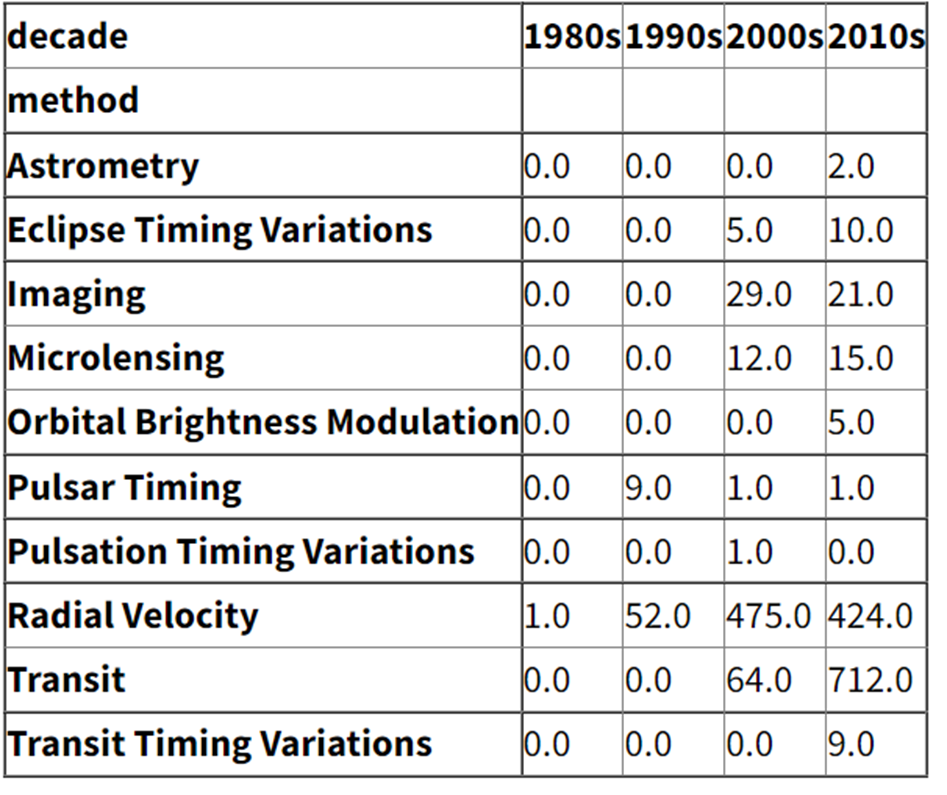

In [157]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
df_overview = (planets.groupby(['method', decade])
                       ['number']
                       .sum()
                       .unstack()
                       .fillna(0))
display(df_overview)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## Working with time series

In [168]:
date = np.array('2015-07-04', dtype = np.datetime64)
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [179]:
np.arange('2015-01-01'
              , '2015-01-20'
              , dtype = np.datetime64
              , step=np.timedelta64(1, 'D'))

array(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
       '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
       '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
       '2015-01-17', '2015-01-18', '2015-01-19'], dtype='datetime64[D]')

In [181]:
np.arange('2015-01-01'
              , '2015-01-20'
              , dtype = np.datetime64
              , step=np.timedelta64(1, 'h'))

array(['2015-01-01T00', '2015-01-01T01', '2015-01-01T02', '2015-01-01T03',
       '2015-01-01T04', '2015-01-01T05', '2015-01-01T06', '2015-01-01T07',
       '2015-01-01T08', '2015-01-01T09', '2015-01-01T10', '2015-01-01T11',
       '2015-01-01T12', '2015-01-01T13', '2015-01-01T14', '2015-01-01T15',
       '2015-01-01T16', '2015-01-01T17', '2015-01-01T18', '2015-01-01T19',
       '2015-01-01T20', '2015-01-01T21', '2015-01-01T22', '2015-01-01T23',
       '2015-01-02T00', '2015-01-02T01', '2015-01-02T02', '2015-01-02T03',
       '2015-01-02T04', '2015-01-02T05', '2015-01-02T06', '2015-01-02T07',
       '2015-01-02T08', '2015-01-02T09', '2015-01-02T10', '2015-01-02T11',
       '2015-01-02T12', '2015-01-02T13', '2015-01-02T14', '2015-01-02T15',
       '2015-01-02T16', '2015-01-02T17', '2015-01-02T18', '2015-01-02T19',
       '2015-01-02T20', '2015-01-02T21', '2015-01-02T22', '2015-01-02T23',
       '2015-01-03T00', '2015-01-03T01', '2015-01-03T02', '2015-01-03T03',
       '2015-01-03T04', '

In [182]:
date_range = np.arange('2015-01-01'
              , '2015-01-20'
              , dtype = np.datetime64
              , step=np.timedelta64(1, 'D'))

date_range + 1

array(['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05',
       '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09',
       '2015-01-10', '2015-01-11', '2015-01-12', '2015-01-13',
       '2015-01-14', '2015-01-15', '2015-01-16', '2015-01-17',
       '2015-01-18', '2015-01-19', '2015-01-20'], dtype='datetime64[D]')

#### In pandas

In [196]:
date = pd.to_datetime('1993-07-12')
print(date)
print(date.strftime('%A'))

1993-07-12 00:00:00
Monday


In [197]:
date = pd.to_datetime("1993-07-12", format = '%Y-%m-%d')

In [198]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['1993-07-12', '1993-07-13', '1993-07-14', '1993-07-15',
               '1993-07-16', '1993-07-17', '1993-07-18', '1993-07-19',
               '1993-07-20', '1993-07-21', '1993-07-22', '1993-07-23'],
              dtype='datetime64[ns]', freq=None)

In [199]:
from datetime import datetime
print(datetime(2020, 1, 1) == pd.to_datetime('2020-01-01'))
print(datetime(2020, 1, 1) is pd.to_datetime('2020-01-01'))

True
False


In [205]:
start_val = 1000
drift = 1
std = 100

start_date = pd.to_datetime('2021-01-01', format = '%Y-%m-%d')
time_index = pd.DatetimeIndex(start_date + pd.to_timedelta(np.arange(365), 'D'))
demand = list()
for date in time_index:
    demand.append(np.random.normal(start_val + drift * (date - start_date).days, std))
    
daily_demand = pd.Series(demand, index = time_index)

<AxesSubplot:>

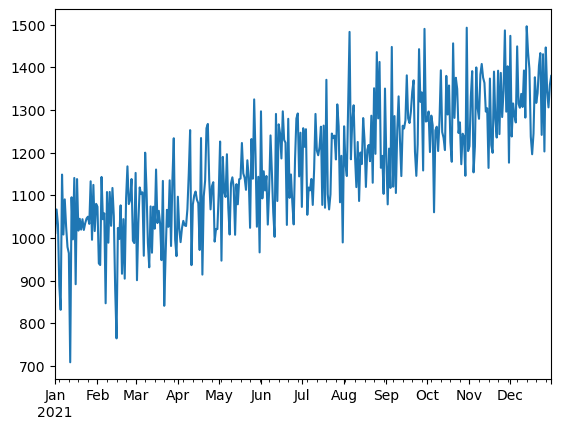

In [206]:
daily_demand.plot()

In [209]:
daily_demand['2021-01-19' : '2021-01-28']

2021-01-19    1044.938651
2021-01-20    1019.563853
2021-01-21    1043.925061
2021-01-22    1018.792484
2021-01-23    1034.487823
2021-01-24    1045.647786
2021-01-25    1049.824834
2021-01-26    1033.012579
2021-01-27    1132.896378
2021-01-28     995.647098
dtype: float64

In [212]:
daily_demand['2021-01']

2021-01-01    1011.686522
2021-01-02    1066.779682
2021-01-03    1031.574818
2021-01-04     887.756867
2021-01-05     831.318277
2021-01-06    1148.646109
2021-01-07    1007.965542
2021-01-08    1090.474590
2021-01-09    1026.349149
2021-01-10     978.801126
2021-01-11     964.131550
2021-01-12     708.207162
2021-01-13    1095.416387
2021-01-14     996.681897
2021-01-15    1140.714367
2021-01-16     891.387897
2021-01-17    1138.084208
2021-01-18    1017.210043
2021-01-19    1044.938651
2021-01-20    1019.563853
2021-01-21    1043.925061
2021-01-22    1018.792484
2021-01-23    1034.487823
2021-01-24    1045.647786
2021-01-25    1049.824834
2021-01-26    1033.012579
2021-01-27    1132.896378
2021-01-28     995.647098
2021-01-29    1124.445038
2021-01-30    1016.136752
2021-01-31    1080.009243
dtype: float64

In [216]:
print(daily_demand.index.to_period('D'))
print(daily_demand.index.to_period('M'))

PeriodIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
             '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
             '2021-01-09', '2021-01-10',
             ...
             '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
             '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
             '2021-12-30', '2021-12-31'],
            dtype='period[D]', length=365)
PeriodIndex(['2021-01', '2021-01', '2021-01', '2021-01', '2021-01', '2021-01',
             '2021-01', '2021-01', '2021-01', '2021-01',
             ...
             '2021-12', '2021-12', '2021-12', '2021-12', '2021-12', '2021-12',
             '2021-12', '2021-12', '2021-12', '2021-12'],
            dtype='period[M]', length=365)


In [214]:
monthly_demand = daily_demand.groupby(daily_demand.index.to_period('M')).mean()
display(monthly_demand)

2021-01    1021.693993
2021-02    1021.361443
2021-03    1046.699375
2021-04    1081.988218
2021-05    1123.477375
2021-06    1168.265313
2021-07    1174.982663
2021-08    1234.927940
2021-09    1261.195233
2021-10    1270.011857
2021-11    1309.941797
2021-12    1340.950834
Freq: M, dtype: float64

In [217]:
daily_demand.index - daily_demand.index[0]

TimedeltaIndex([  '0 days',   '1 days',   '2 days',   '3 days',   '4 days',
                  '5 days',   '6 days',   '7 days',   '8 days',   '9 days',
                ...
                '355 days', '356 days', '357 days', '358 days', '359 days',
                '360 days', '361 days', '362 days', '363 days', '364 days'],
               dtype='timedelta64[ns]', length=365, freq=None)

In [218]:
time_index = pd.DatetimeIndex(start_date + pd.to_timedelta(np.arange(365), 'D'))
time_index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq=None)

In [219]:
pd.date_range('2021-01-01', '2021-12-31')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [220]:
pd.date_range('2021-01-01', periods = 365)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [222]:
pd.period_range('2021-01-01', periods = 365, freq = 'D')

PeriodIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
             '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
             '2021-01-09', '2021-01-10',
             ...
             '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
             '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
             '2021-12-30', '2021-12-31'],
            dtype='period[D]', length=365)

In [223]:
pd.date_range('2021-01-01', periods = 365, freq = 'D')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [224]:
time_range1 = pd.period_range('2021-01-01', '2022-01-01', freq = 'D')
time_range2 = pd.date_range('2021-01-01', '2022-01-01', freq = 'D')
time_range3 = pd.date_range('2021-01-01', '2022-01-01', freq = 'H')

print(time_range1[0] == time_range2[0])
print(time_range2[0] == time_range3[0])
print(time_range1[0] == '2021-01-01')
print(time_range1[0] == pd.to_datetime('2021-01-01', format = '%Y-%m-%d'))

False
True
False
False


In [225]:
pd.timedelta_range(0, periods = 9, freq = "2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

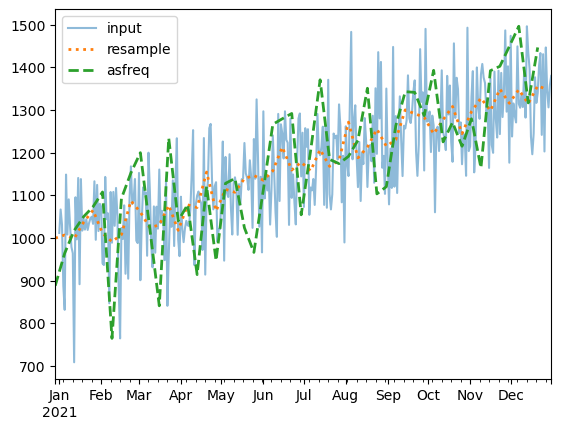

In [230]:
import matplotlib.pyplot as plt
daily_demand.plot(alpha = 0.5)
daily_demand.resample('W-MON').mean().plot(style=':', linewidth = 2)
daily_demand.asfreq('W-MON').plot(style = '--', linewidth = 2)
plt.legend(['input', 'resample', 'asfreq'])

<AxesSubplot:>

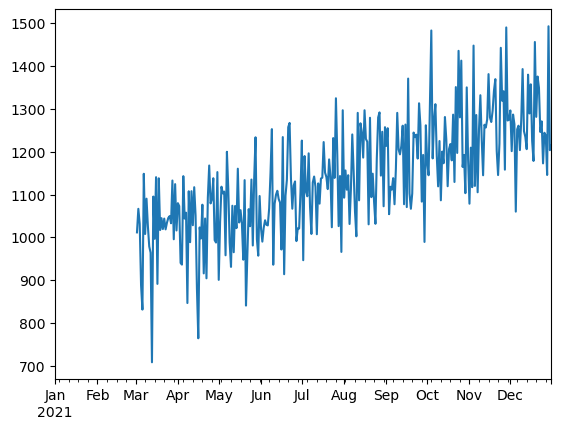

In [233]:
daily_demand.shift(60).plot()

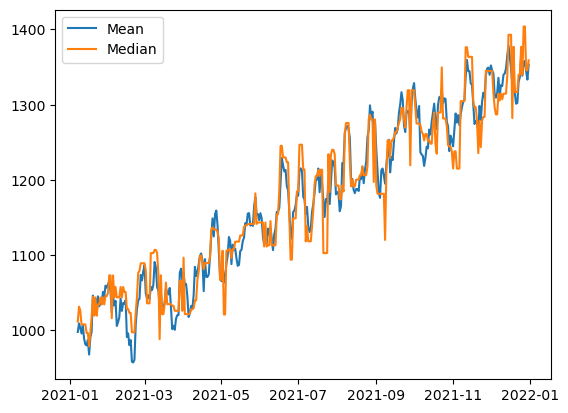

In [234]:
rolling_demand = daily_demand.rolling(7)
plt.plot(rolling_demand.mean())
plt.plot(rolling_demand.median())
plt.legend(['Mean', 'Median'])

In [ ]:
rolling_demand.mean()

## Vectorizes string operations

In [236]:
monte = pd.Series(['Graham Chapman'
                      , 'John Cleese'
                      , 'Terry Gilliam'
                      , 'Erid Idle'
                      , 'Terry jones'
                      , 'Michael Palin'])

In [237]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [242]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Erid
4,Terry
5,Michael


In [249]:
df = monte.str.extract('([A-Za-z]+) ([A-Za-z]+)')
df = df.rename({
                    0 : 'First Name',
                    1 : 'Last Name'
                }, axis = 1)

In [250]:
df

,First Name,Last Name
0,Graham,Chapman
1,John,Cleese
2,Terry,Gilliam
3,Erid,Idle
4,Terry,jones
5,Michael,Palin
